<a href="https://colab.research.google.com/github/Savijapasandul/robo_chess/blob/main/initial_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

to activate the virtual env:

In [ ]:
!pip install Stockfish
import cv2
from stockfish import Stockfish

def extract_chess_board_from_image(image):
    starting_fen = "rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR"
    return starting_fen

def main():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cap.release()

    if not ret:
        print("Failed to capture image from the camera.")
        return

    cv2.imshow("Captured Chessboard", frame)
    cv2.waitKey(2000)
    cv2.destroyAllWindows()


    fen = extract_chess_board_from_image(frame)
    print("Extracted FEN:", fen)


    stockfish_path = "/path/to/stockfish"

    stockfish = Stockfish(stockfish_path)
    stockfish.set_fen_position(fen)


    best_move = stockfish.get_best_move()
    print("Best Move according to Stockfish:", best_move)

if __name__ == "__main__":
    main()


Failed to capture image from the camera.


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
# Install dependencies
!pip install -q stockfish opencv-python

# --- Imports ---
import cv2
import numpy as np
from stockfish import Stockfish
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode


# --- Webcam Capture ---
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


# --- Placeholder Chessboard Extraction ---
def extract_chess_board_from_image(image):
    """
    Stub function: In reality, this should analyze the image,
    detect the pieces, and generate a FEN string.
    """
    print("🧠 [Stub] Analyzing image... returning standard starting FEN.")
    return "rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1"


# --- Main Function ---
def main():
    try:
        filename = take_photo()
        print(f'✅ Image saved to {filename}')
        display(Image(filename))

        # Read and process the image
        image = cv2.imread(filename)

        # Extract FEN from the image
        fen = extract_chess_board_from_image(image)
        print("Extracted FEN:", fen)

        # Path to Stockfish (Colab can't run system binaries directly; this assumes Stockfish is installed)
        stockfish_path = "/usr/games/stockfish"  # or replace with a valid path to a Stockfish binary you upload

        stockfish = Stockfish(path=stockfish_path)
        stockfish.set_fen_position(fen)
        best_move = stockfish.get_best_move()
        print("♟ Best Move according to Stockfish:", best_move)

    except Exception as err:
        print(f"❌ Error: {err}")


# --- Run ---
main()


<IPython.core.display.Javascript object>

# **Verify NVIDIA GPU Availability**


In [ ]:
%nvidia-smi

UsageError: Line magic function `%nvidia-smi` not found.


In [ ]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


# Data-set

In [ ]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="k3A3mnyIf2w3F2fjWMxG")
project = rf.workspace("savijas-workspace").project("chess-g5x1b-wx2jr")
version = project.version(3)
dataset = version.download("yolov11")


Note: you may need to restart the kernel to use updated packages.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chess-3 in yolov11:: 100%|██████████| 47/47 [00:00<00:00, 4271.83it/s]


Training model

In [ ]:
%yolo detect train data=/content/Chess-1/data.yaml model=yolo11n.pt epochs=60 imgsz=640

UsageError: Line magic function `%yolo` not found.


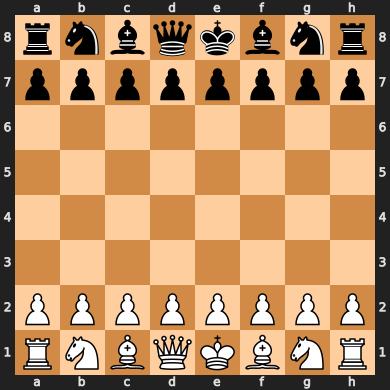

In [2]:
import chess

board = chess.Board()

board

In [3]:
board.legal_moves  

<LegalMoveGenerator at 0x7335b59f7ce0 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>

In [4]:
chess.Move.from_uci("a8a1") in board.legal_moves

False

In [5]:
board.push_san("e4")

Move.from_uci('e2e4')

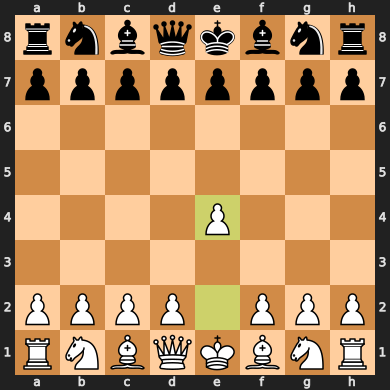

In [6]:
board

In [ ]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="k3A3mnyIf2w3F2fjWMxG")
project = rf.workspace("savijas-workspace").project("robo_chess")
version = project.version(5)
dataset = version.download("yolov11")
                